### This notebook processes this project's hypothesis 1: 
#### Electronic waste generation per capita and % of material recovery have a strong relationship with education. We will use both education attainment and education expenditure statistics to evaluate the relationship.

In [3]:
%matplotlib inline

import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

import datetime
import climate_change_util as cc #Importing util file with functions as module

In [4]:
clean_df = pd.read_csv('clean_df.csv') #Importing cleaned and merged csv file created in the data processing file. 

In [5]:
clean_df = clean_df.drop(['Unnamed: 0'],axis=1)

In [6]:
clean_df.head(10)

,Year,COU,Country,Composting%,Disposal%,Landfill%,Material_recovery%,Recovery%,Recycling%,Amt_for_recovery_operations,...,Education_expense_%_of_total_exp,Population_density,Population_growth%,Population_female,Population_female_%,Population_total,Poverty_headcount%_ppp,Poverty_headcount%_national_line,Population_urban%,Population_urban_growth%
0,1990,AUT,Austria,23.171,56.277,56.277,34.529,43.723,11.358,1536.00,...,11.513110,93.042293,0.762002,4005232,52.166067,7677850,NaN,NaN,62.960,0.332494
1,1990,BEL,Belgium,5.983,66.751,43.853,11.108,33.249,5.125,1317.00,...,NaN,NaN,0.298236,5090672,51.073323,9967379,NaN,NaN,96.377,0.386473
2,1990,CHE,Switzerland,6.341,22.680,22.680,28.547,77.320,22.207,3170.60,...,17.181641,169.888411,1.026873,3437405,51.185991,6715519,NaN,NaN,73.926,0.945759
3,1990,CHN,China (People's Republic of),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,120.448249,1.467303,552721134,48.689961,1135185000,72.0,NaN,26.442,4.309678
4,1990,DEU,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,227.517054,0.861969,41104568,51.747451,79433029,NaN,NaN,73.118,1.056365
5,1990,ESP,Spain,20.330,76.210,74.345,20.846,23.790,0.516,3000.05,...,10.142290,77.821804,0.101829,19827512,51.013323,38867322,0.5,NaN,75.351,0.400879
6,1990,GBR,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,700.00,...,11.099460,236.628719,0.298931,29420457,51.391611,57247586,NaN,NaN,78.140,0.234965
7,1990,GRC,Greece,NaN,94.043,94.043,5.957,5.957,5.957,178.70,...,7.198430,79.106222,1.057808,5141255,50.420321,10196792,NaN,NaN,71.467,1.321212
8,1990,HUN,Hungary,0.000,92.807,92.807,0.000,7.193,0.000,300.00,...,NaN,115.433270,-1.033117,5391730,51.973555,10373988,NaN,NaN,65.838,-0.990579
9,1990,ITA,Italy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,192.850430,0.083709,29146541,51.387397,56719240,NaN,NaN,66.726,0.053739


In [7]:
clean_df.columns

Index(['Year', 'COU', 'Country', 'Composting%', 'Disposal%', 'Landfill%',
       'Material_recovery%', 'Recovery%', 'Recycling%',
       'Amt_for_recovery_operations', 'Composting', 'Electronic_waste',
       'Household_waste', 'Landfill', 'Municipal_waste_generated',
       'Municipal_waste_generated_percapita', 'Municipal_waste_generated_1990',
       'Municipal_waste_generated_2000', 'Municipal_waste_treated',
       'Recycling', 'Total_Incineration', 'Waste_from_households', 'Country_y',
       'CO2_emissions_percapita', 'Female_education_attainment_bach',
       'Male_education_attainment_bach', 'Total_education_attainment_bach',
       'Energy_use_percapita', 'Forest_area', 'GDP_2015_USD', 'GDP_growth%',
       'GDP_percapita_2015_USD', 'GDP_percapita_growth%',
       'Education_expense_%_of_gdp', 'Education_expense_%_of_total_exp',
       'Population_density', 'Population_growth%', 'Population_female',
       'Population_female_%', 'Population_total', 'Poverty_headcount%_ppp',
 

In [8]:
# Subsetting dataframe to keep relevant columns for hypothesis 1
hyp1_df = pd.DataFrame(data=clean_df, columns=['Year','COU','Country','Material_recovery%','Electronic_waste',\
                                               'Population_total','Female_education_attainment_bach','Male_education_attainment_bach',\
                                               'Total_education_attainment_bach','Education_expense_%_of_gdp',\
                                               'Education_expense_%_of_total_exp'])

In [9]:
hyp1_df.columns

Index(['Year', 'COU', 'Country', 'Material_recovery%', 'Electronic_waste',
       'Population_total', 'Female_education_attainment_bach',
       'Male_education_attainment_bach', 'Total_education_attainment_bach',
       'Education_expense_%_of_gdp', 'Education_expense_%_of_total_exp'],
      dtype='object')

In [10]:
#Creating electronic waste generation per capita variable
hyp1_df['Electronic_waste_percapita'] = hyp1_df['Electronic_waste']/hyp1_df['Population_total']

In [11]:
hyp1_df.dtypes

Year                                  int64
COU                                  object
Country                              object
Material_recovery%                  float64
Electronic_waste                    float64
Population_total                      int64
Female_education_attainment_bach    float64
Male_education_attainment_bach      float64
Total_education_attainment_bach     float64
Education_expense_%_of_gdp          float64
Education_expense_%_of_total_exp    float64
Electronic_waste_percapita          float64
dtype: object

In [12]:
#Converting object to string
hyp1_df['COU'] = hyp1_df['COU'].astype('string')
hyp1_df['Country'] = hyp1_df['Country'].astype('string')

In [13]:
hyp1_df.dtypes

Year                                  int64
COU                                  string
Country                              string
Material_recovery%                  float64
Electronic_waste                    float64
Population_total                      int64
Female_education_attainment_bach    float64
Male_education_attainment_bach      float64
Total_education_attainment_bach     float64
Education_expense_%_of_gdp          float64
Education_expense_%_of_total_exp    float64
Electronic_waste_percapita          float64
dtype: object

### Histogram  and density plots of each vairable

In [16]:
plot_list = hyp1_df[['Material_recovery%','Electronic_waste','Electronic_waste_percapita']]

def hist_plots(df,var): 
    plt.hist(df[var], bins='auto', color='#0504aa')
    plt.title(var)
    plt.show()
   

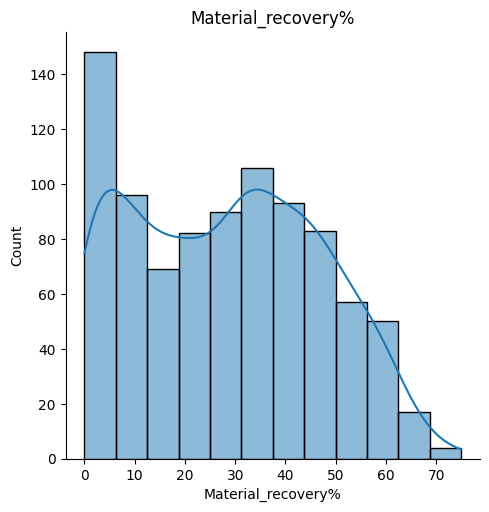

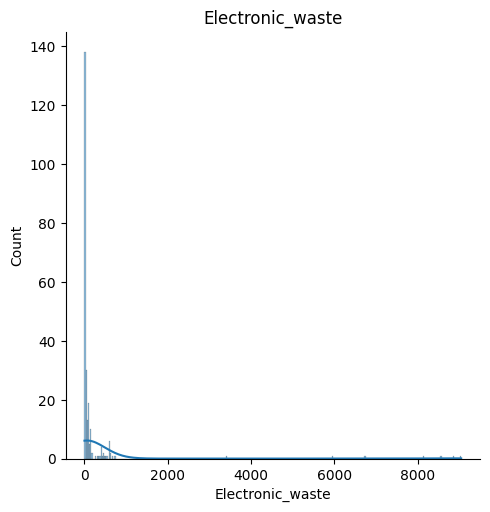

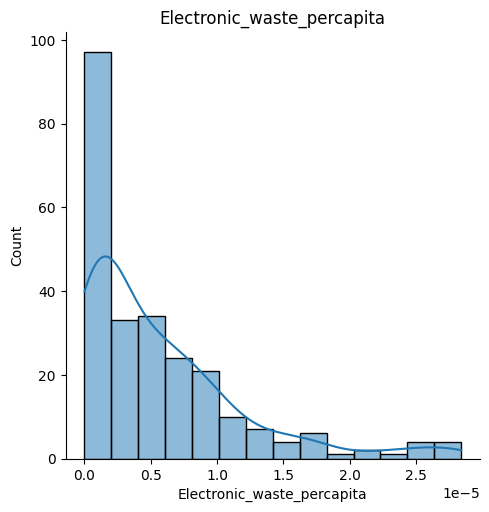

In [17]:
for var in plot_list:
    cc.density_plots(hyp1_df,var)

###### Observations: Both variables are non-normal. 

### Overall trends of variables

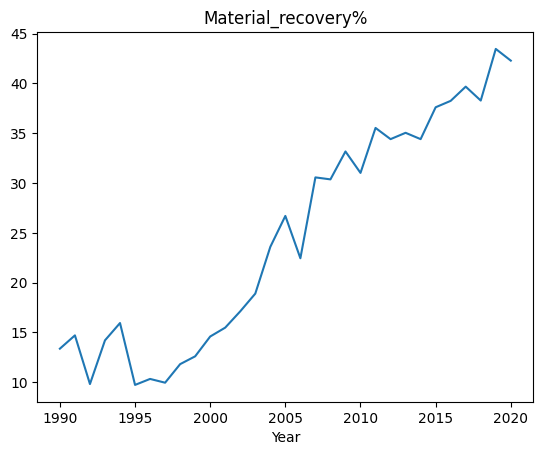

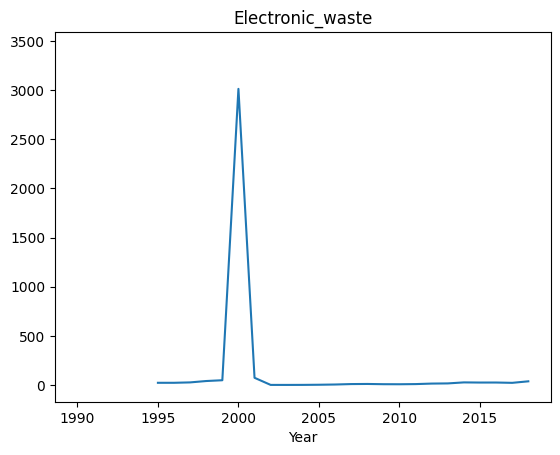

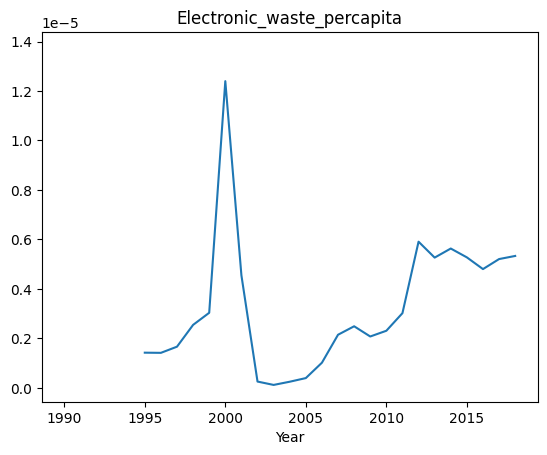

In [18]:
for var in plot_list:
    cc.median_trend_plots(hyp1_df,'Year',var)

###### Observations (median trends over time, on an average for the developed world):

1. Material recovery has had a sharp upward trend post 1995. 

2. Electronic waste generation had a peak around 2000 but flattened quickly and remained so. 

3. Electronic waste per capita had a similar peak and fell down right after. However, It has had an upward trend in the recent years. 

### Median share of each country for each variable

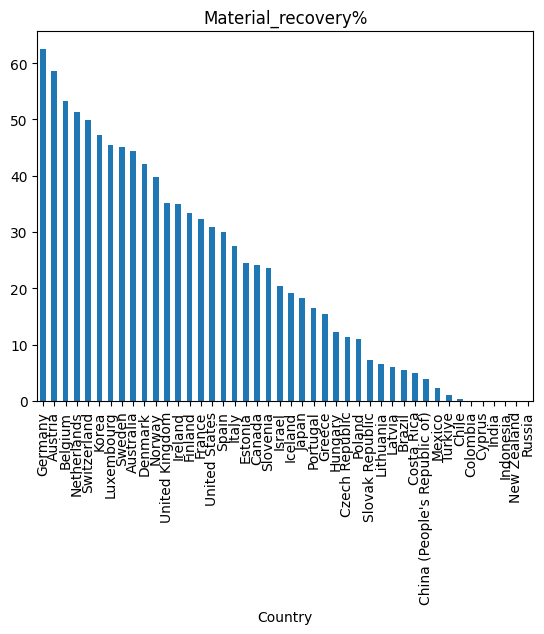

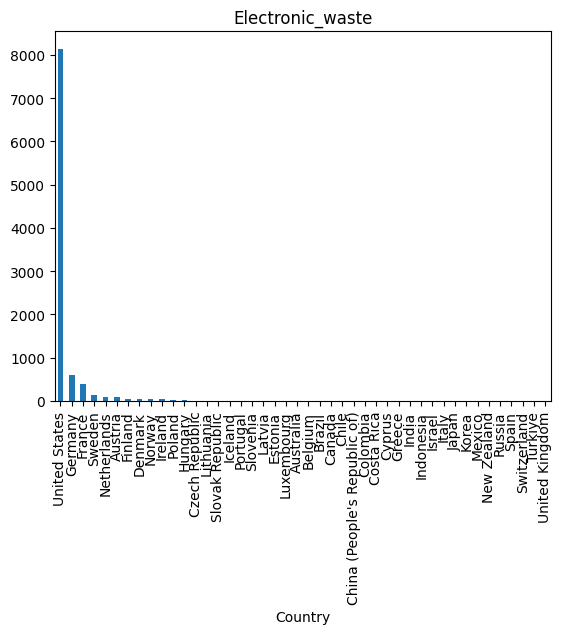

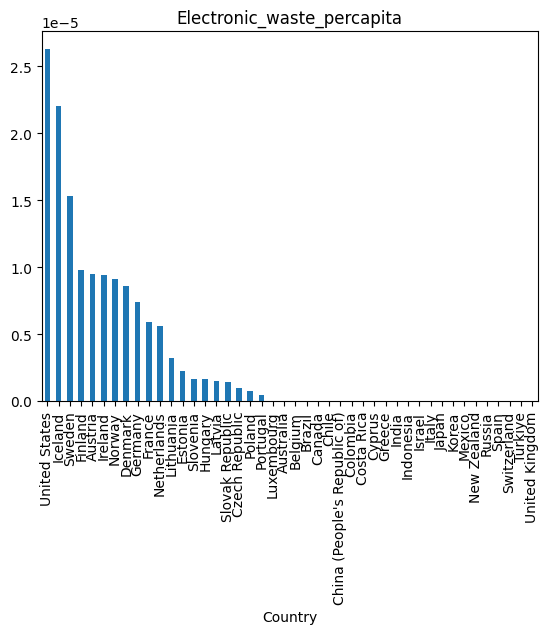

In [19]:
for var in plot_list:
    hyp1_df.groupby('Country')[var].median().sort_values(ascending=False).plot(kind='bar', title=var)
    plt.xlabel('Country')
    plt.show()

###### Observations (on average over time) :

1. Unites States generates the most electronic waste per capita and overall (8000 tonnes). 

2. Germany has the most amount of material recovery over time (60%).

### Time trend for each variable

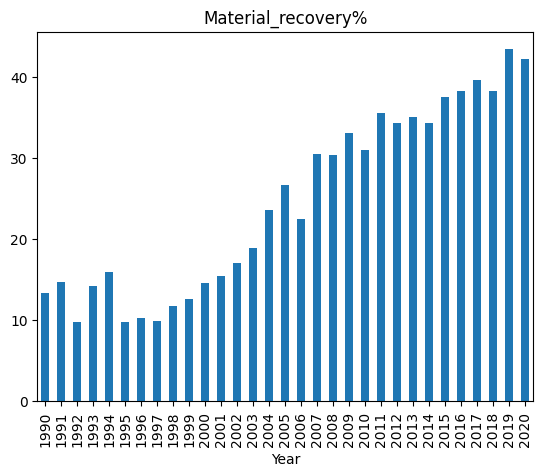

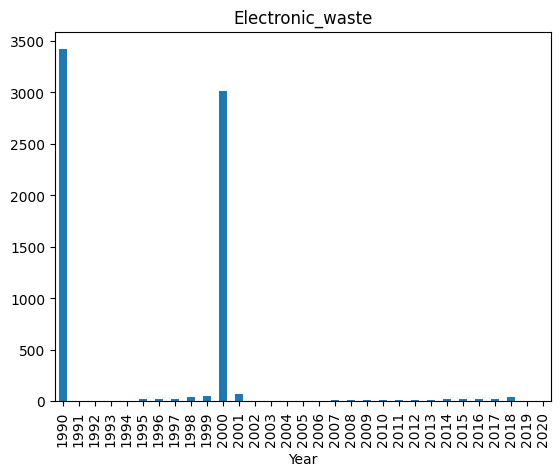

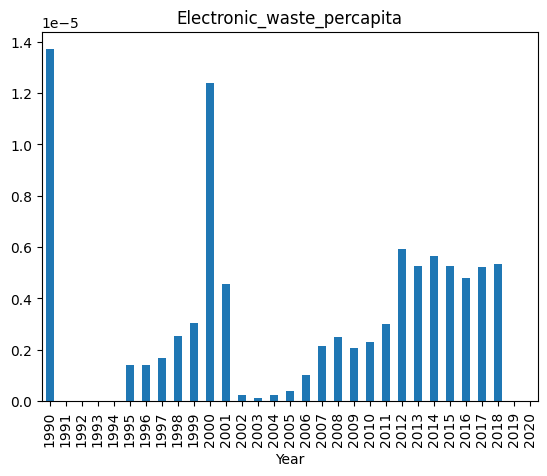

In [21]:
for var in plot_list:
    hyp1_df.groupby('Year')[var].median().plot(kind='bar', title=var)
    plt.xlabel('Year')
    plt.show()

###### Observations:
1. Material recovery peaked in 2019. Overall, it has been higher in the recent years. 

2. Electronic waste generation peaked in 1990 and 2000. For all other years, including recent ones, it has been negligible. 

3. Electronic waste generation also peaked in 1990 and 2000. However, it has had considerable shares in other years as well. 


In [22]:
# Creating lists of variables to iterate on for plotting
plot_list = hyp1_df[['Material_recovery%','Electronic_waste','Electronic_waste_percapita']]

Educ_attainment_list = hyp1_df[['Female_education_attainment_bach',\
                    'Male_education_attainment_bach','Total_education_attainment_bach']]

Educ_expense_list = hyp1_df[['Education_expense_%_of_gdp','Education_expense_%_of_total_exp']]

## Scatter plots to infer correlation

### Material Recovery and Education Attainment

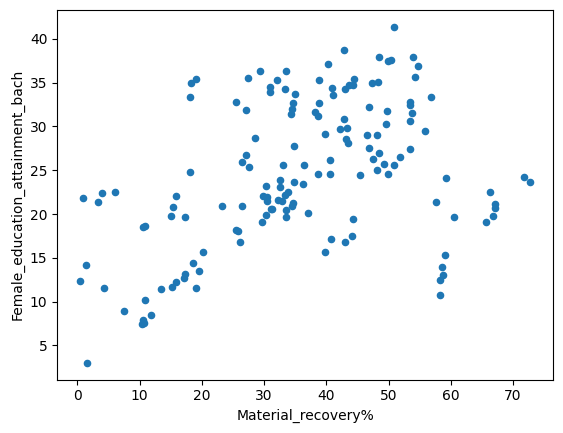

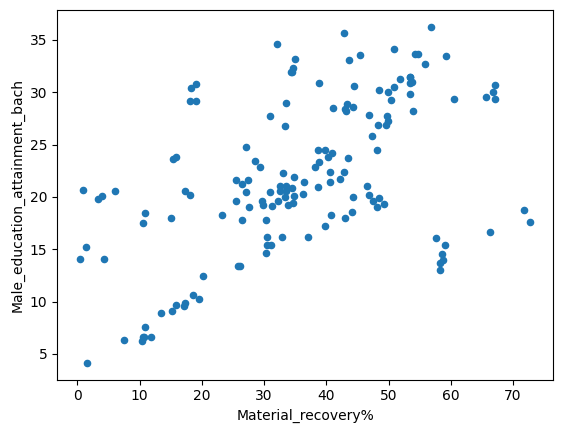

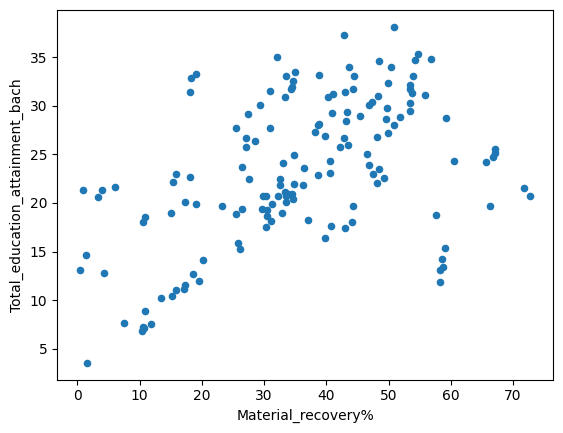

In [23]:
for var in Educ_attainment_list:
    hyp1_df.plot.scatter(x="Material_recovery%", y=var)

###### Observations:
Education attainment, including that of female and male, seem to have a linear relationship with material recovery. More material recovery % seems to be correlated with higher education attainment. 


### Electronic Waste Generation Per Capita and Education Attainment

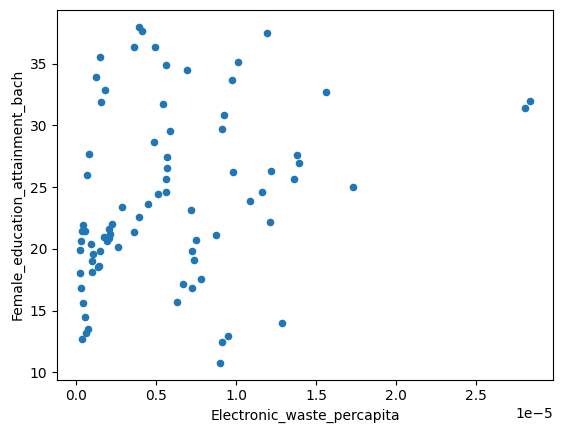

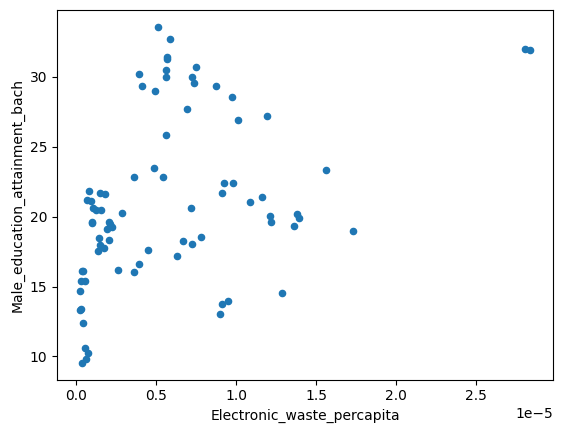

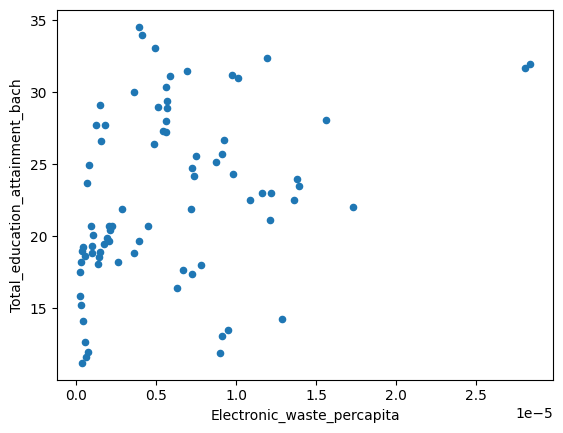

In [24]:
for var in Educ_attainment_list:
    hyp1_df.plot.scatter(x="Electronic_waste_percapita", y=var)

###### Observations:
Education attainment, including for that of female and male, mostly remain constant irrespective of the levels of electronic waste generation per capita. There does not seem to be an obvious relationship between education attainment and electronic waste generated per capita. 

### Electronic Waste Generation and Education Attainment

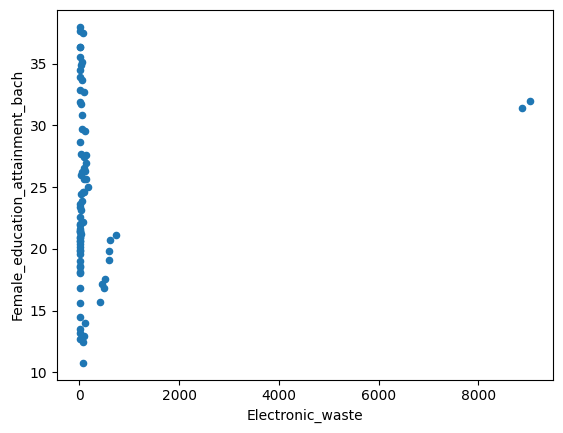

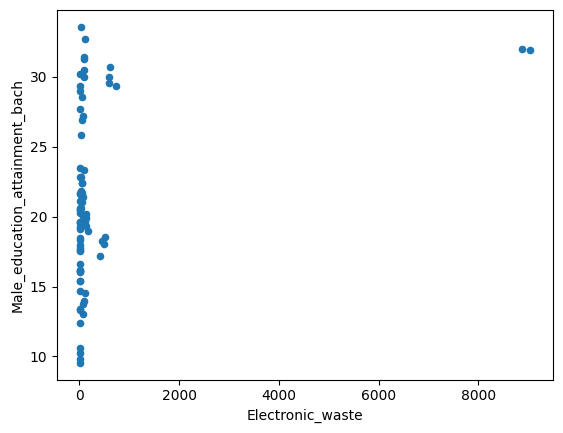

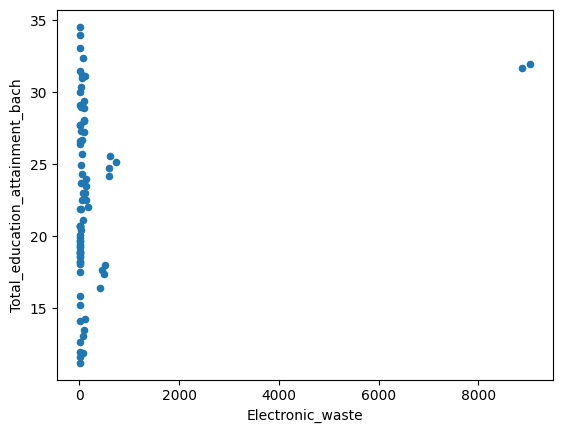

In [25]:
for var in Educ_attainment_list:
    hyp1_df.plot.scatter(x="Electronic_waste", y=var)

###### Observations:
Education attainment, including for that of female and male, remain constant irrespective of the levels of electronic waste generation. There does not seem to be an obvious relationship between education attainment and electronic waste generated overall. 

### Material Recovery and Education Expenditure

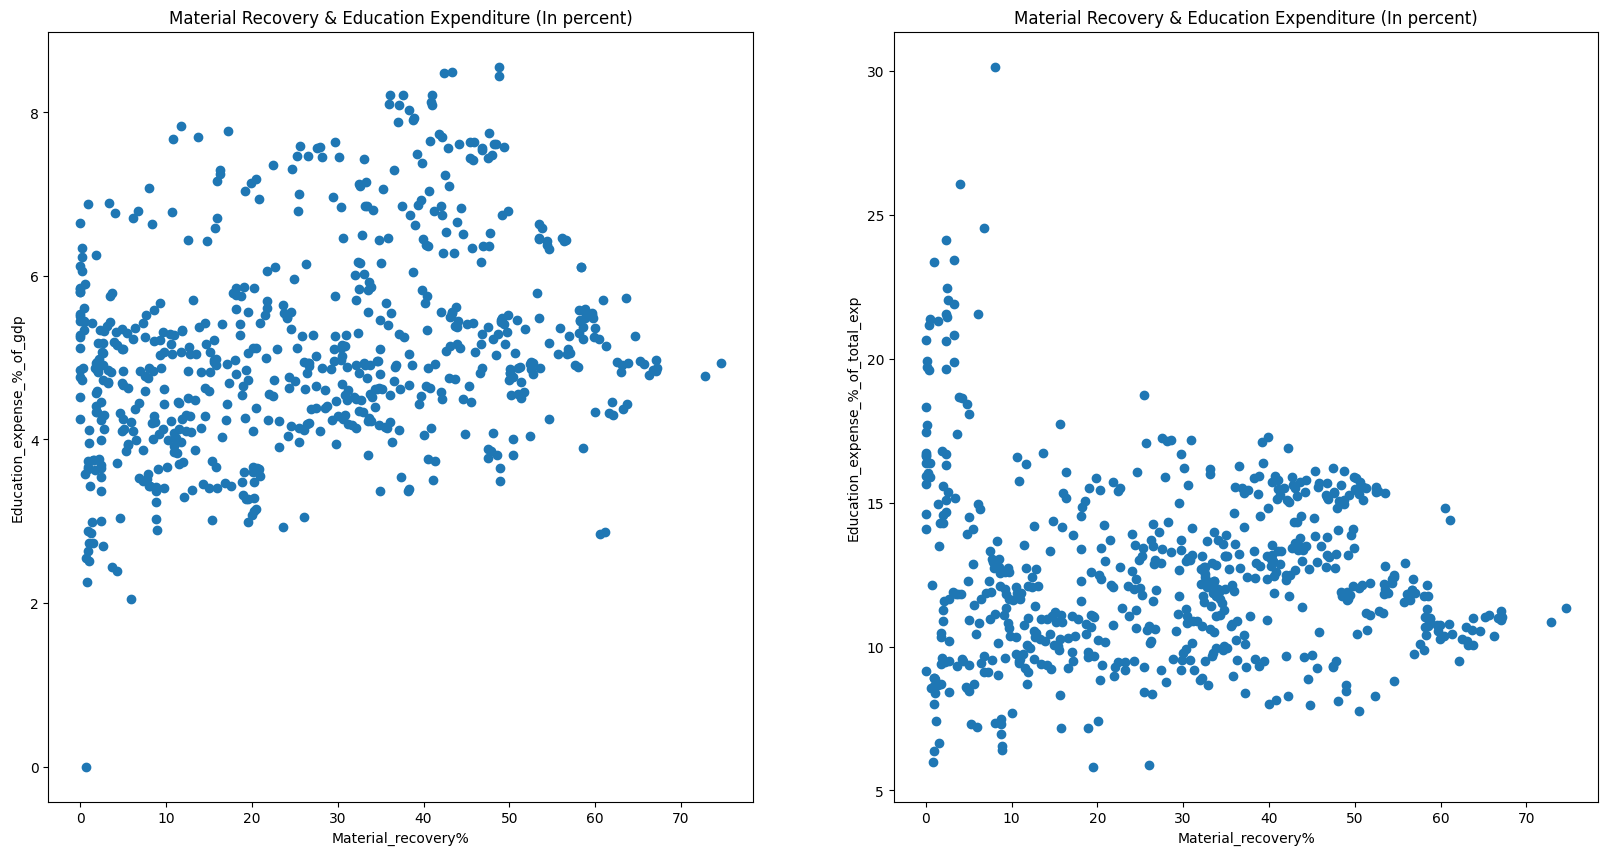

In [26]:
i = 0
fig, ax = plt.subplots(figsize=(20,10), nrows = 1, ncols = 2)
for var in Educ_expense_list:
    ax[i].set(xlabel='Material_recovery%', ylabel=var)
    ax[i].set_title('Material Recovery & Education Expenditure (In percent)')
    ax[i].scatter(x=hyp1_df['Material_recovery%'], y=hyp1_df[var])
    i += 1


###### Observations:
At higher levels (4-7%) of education expense as % of GDP, there is a linear relationship with material recovery. For education expense as % of total government expense has a linear relationship with material recovery at its lower levels (5-15%). 

### Electronic Waste Generation Per Capita and Education Expenditure

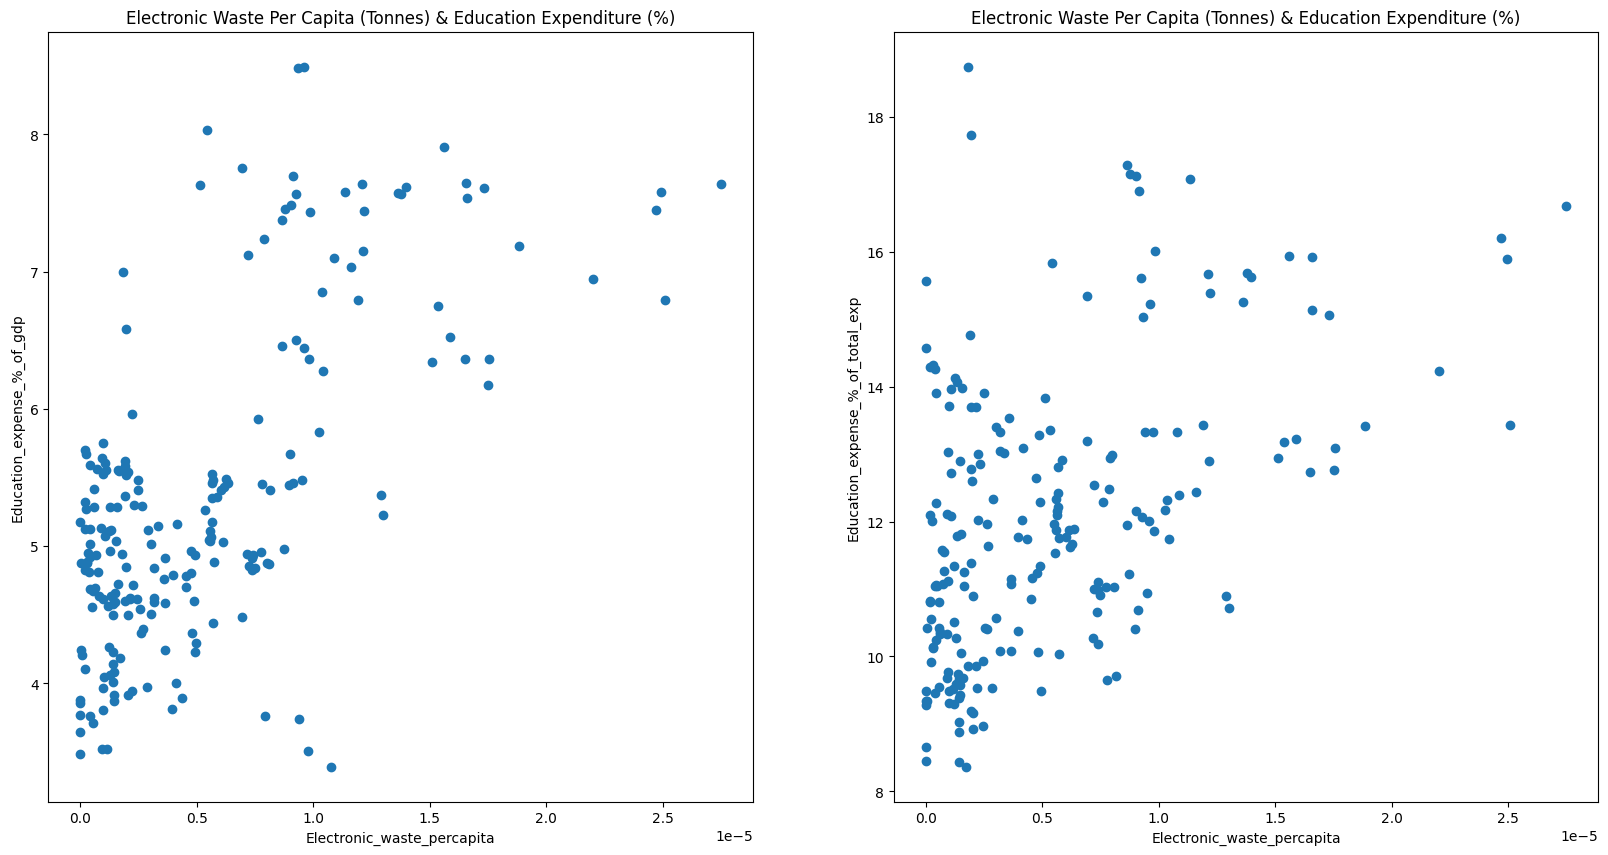

In [27]:
i = 0
fig, ax = plt.subplots(figsize=(20,10), nrows = 1, ncols = 2)
for var in Educ_expense_list:
    ax[i].set(xlabel='Electronic_waste_percapita', ylabel=var)
    ax[i].set_title('Electronic Waste Per Capita (Tonnes) & Education Expenditure (%)')
    ax[i].scatter(x=hyp1_df['Electronic_waste_percapita'], y=hyp1_df[var])
    i += 1


###### Observations:
Education expense, both as a percentage of GDP and that of total expenditure remains mostly unaffected by levels of electronic waste generation percapita, barring some outliers at high levels.

### Electronic Waste and Education Expenditure

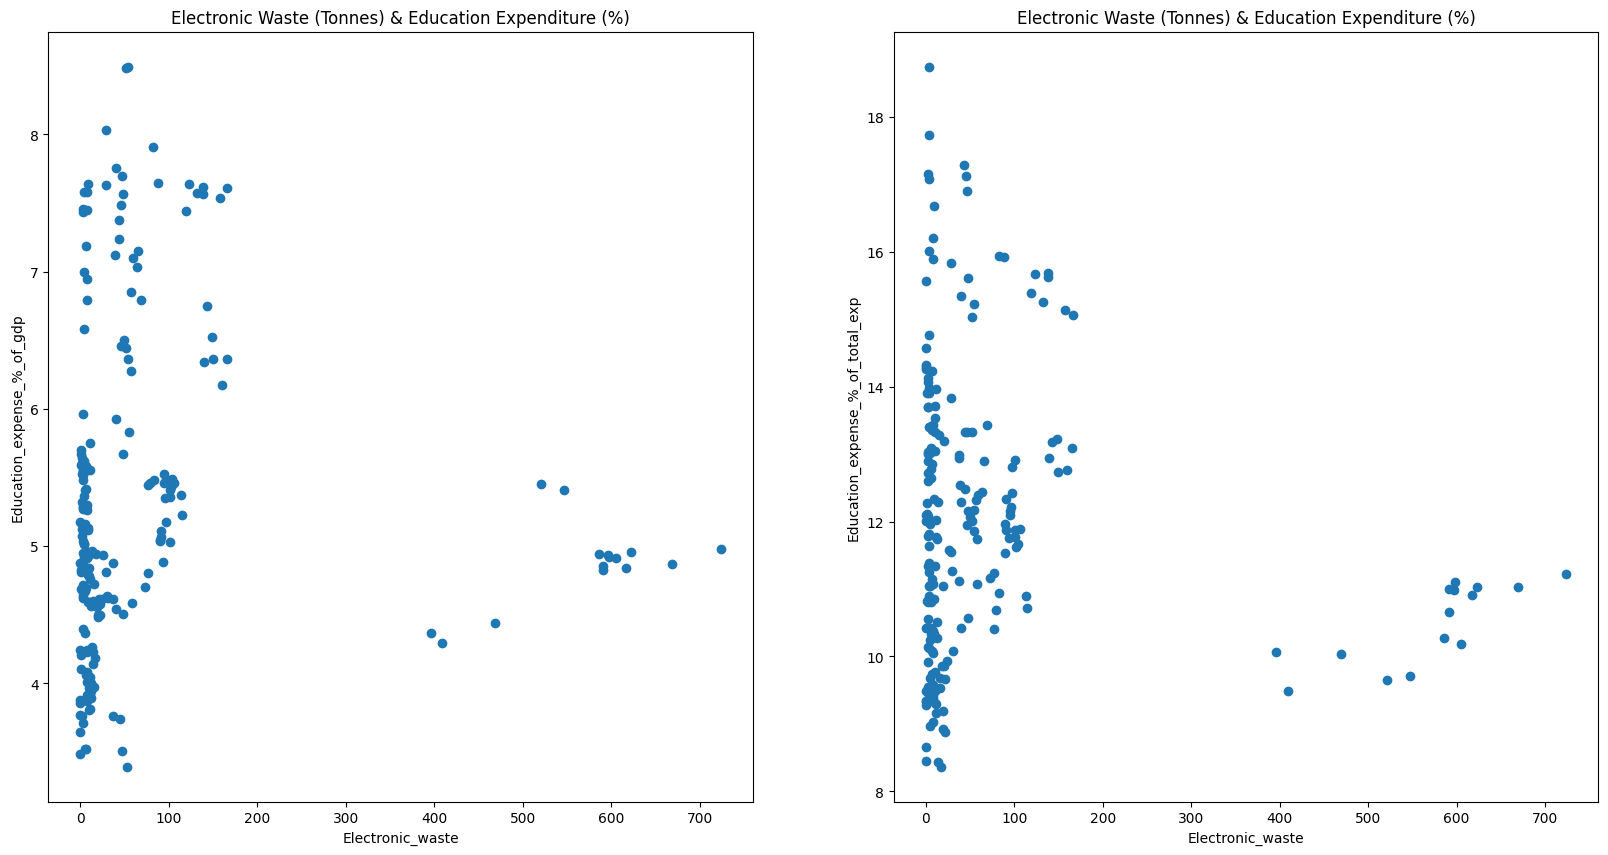

In [28]:
i = 0
fig, ax = plt.subplots(figsize=(20,10), nrows = 1, ncols = 2)
for var in Educ_expense_list:
    ax[i].set(xlabel='Electronic_waste', ylabel=var)
    ax[i].set_title('Electronic Waste (Tonnes) & Education Expenditure (%)')
    ax[i].scatter(x=hyp1_df["Electronic_waste"], y=hyp1_df[var])
    i += 1

###### Observations:
Education expense, both as a percentage of GDP and that of total expenditure remains constant irrespective of the levels of electronic waste generation.

### Overall Correlation Matrix

In [29]:
corr_matrix = hyp1_df.corr()
strong_corr_matrix = corr_matrix[abs(corr_matrix) >= 0.5]
print(strong_corr_matrix)


                                      Year  Material_recovery%  \
Year                              1.000000                 NaN   
Material_recovery%                     NaN            1.000000   
Electronic_waste                       NaN                 NaN   
Population_total                       NaN                 NaN   
Female_education_attainment_bach  0.513089                 NaN   
Male_education_attainment_bach         NaN            0.512776   
Total_education_attainment_bach   0.513157                 NaN   
Education_expense_%_of_gdp             NaN                 NaN   
Education_expense_%_of_total_exp       NaN                 NaN   
Electronic_waste_percapita             NaN                 NaN   

                                  Electronic_waste  Population_total  \
Year                                           NaN               NaN   
Material_recovery%                             NaN               NaN   
Electronic_waste                          1.000000       

/var/folders/74/0s3qg3912fzfj_dgytz558vr0000gn/T/ipykernel_40153/2162578916.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = hyp1_df.corr()


### Overall Correlation Matrix Plots

/var/folders/74/0s3qg3912fzfj_dgytz558vr0000gn/T/ipykernel_40153/669649818.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = hyp1_df.corr()


<AxesSubplot: >

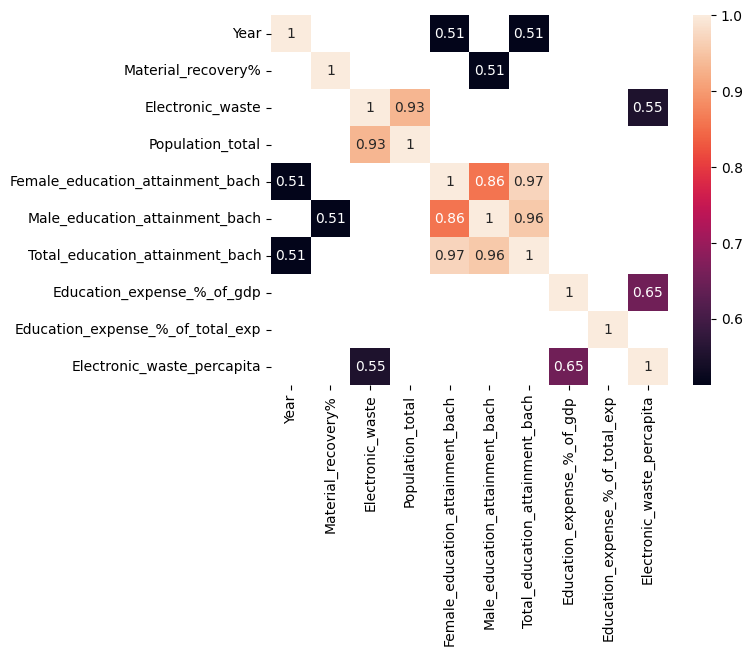

In [30]:
cor = hyp1_df.corr()
cor = cor[abs(cor)>0.5]
sns.heatmap(cor, annot=True)

###### Observations:
1. Electronic waste generation has a high correlation with total population. 

2. Electronic waste generated per capita is also strongly correlated with education expense as a % of GDP. 

### Correlation Between Variables of Interest for Each Country

In [31]:
#Creating country and variable pairwise list
Country_list = hyp1_df['Country'].unique()
corr_varlist = [('Electronic_waste','Education_expense_%_of_total_exp'), ('Electronic_waste','Education_expense_%_of_gdp'),\
               ('Electronic_waste_percapita','Education_expense_%_of_total_exp'), ('Electronic_waste_percapita','Education_expense_%_of_gdp'),\
               ('Material_recovery%','Education_expense_%_of_total_exp'), ('Material_recovery%','Education_expense_%_of_gdp'),\
               ('Electronic_waste','Total_education_attainment_bach'),\
               ('Electronic_waste_percapita','Total_education_attainment_bach'),\
               ('Material_recovery%','Total_education_attainment_bach'), \
               ('Electronic_waste','Female_education_attainment_bach'), \
            ('Electronic_waste_percapita','Female_education_attainment_bach'), \
               ('Material_recovery%', 'Female_education_attainment_bach'),\
               ('Electronic_waste','Male_education_attainment_bach'),\
            ('Electronic_waste_percapita','Male_education_attainment_bach'),\
               ('Material_recovery%', 'Male_education_attainment_bach')]


Austria:  Pearsons correlation: 0.421
Germany:  Pearsons correlation: 0.837
Hungary:  Pearsons correlation: -0.296
Luxembourg:  Pearsons correlation: nan
Netherlands:  Pearsons correlation: 0.905
Norway:  Pearsons correlation: -0.317
Poland:  Pearsons correlation: 0.037
Portugal:  Pearsons correlation: 0.520
Sweden:  Pearsons correlation: -0.479
Finland:  Pearsons correlation: 0.256
France:  Pearsons correlation: 1.000
Slovak Republic:  Pearsons correlation: -0.431
Denmark:  Pearsons correlation: -0.022
Czech Republic:  Pearsons correlation: 0.153
Estonia:  Pearsons correlation: -0.393
Ireland:  Pearsons correlation: 0.895
Iceland:  Pearsons correlation: -0.350
Lithuania:  Pearsons correlation: -0.644
Latvia:  Pearsons correlation: -0.147
Slovenia:  Pearsons correlation: -0.607


/Users/vibha/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


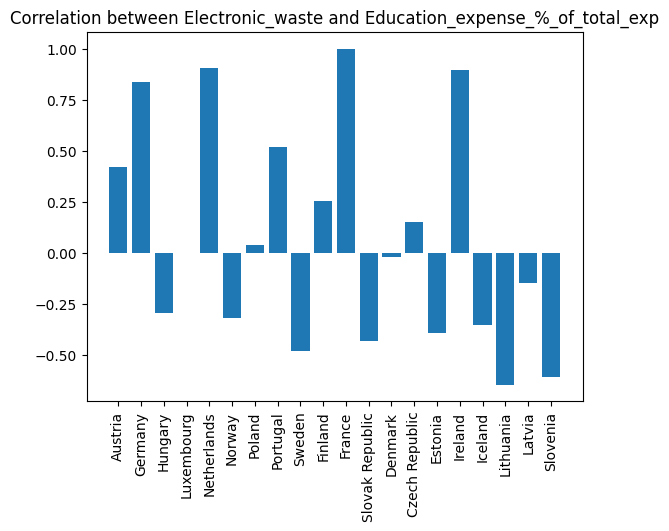

Austria:  Pearsons correlation: -0.852
Germany:  Pearsons correlation: 0.921
Hungary:  Pearsons correlation: -0.574
Luxembourg:  Pearsons correlation: nan
Netherlands:  Pearsons correlation: 0.861
Norway:  Pearsons correlation: 0.061
Poland:  Pearsons correlation: 0.003
Portugal:  Pearsons correlation: 0.164
Sweden:  Pearsons correlation: -0.423
Finland:  Pearsons correlation: 0.413
France:  Pearsons correlation: -1.000
Slovak Republic:  Pearsons correlation: -0.018
Denmark:  Pearsons correlation: -0.184
Czech Republic:  Pearsons correlation: 0.108
Estonia:  Pearsons correlation: 0.167
Ireland:  Pearsons correlation: -0.727
Iceland:  Pearsons correlation: -0.183
Lithuania:  Pearsons correlation: -0.537
Latvia:  Pearsons correlation: -0.137
Slovenia:  Pearsons correlation: -0.829


/Users/vibha/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


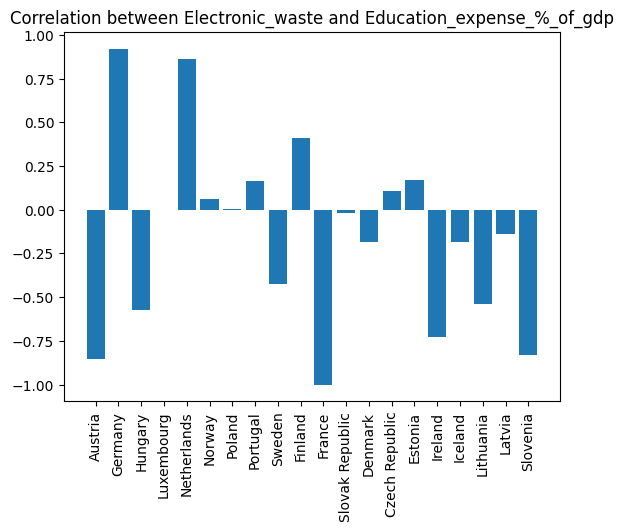

Austria:  Pearsons correlation: 0.402
Germany:  Pearsons correlation: 0.848
Hungary:  Pearsons correlation: -0.293
Luxembourg:  Pearsons correlation: nan
Netherlands:  Pearsons correlation: 0.892
Norway:  Pearsons correlation: -0.286
Poland:  Pearsons correlation: 0.036
Portugal:  Pearsons correlation: 0.529
Sweden:  Pearsons correlation: -0.651
Finland:  Pearsons correlation: 0.272
France:  Pearsons correlation: 1.000
Slovak Republic:  Pearsons correlation: -0.433
Denmark:  Pearsons correlation: -0.015
Czech Republic:  Pearsons correlation: 0.156
Estonia:  Pearsons correlation: -0.398
Ireland:  Pearsons correlation: 0.905
Iceland:  Pearsons correlation: -0.383
Lithuania:  Pearsons correlation: -0.656
Latvia:  Pearsons correlation: -0.169
Slovenia:  Pearsons correlation: -0.607


/Users/vibha/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


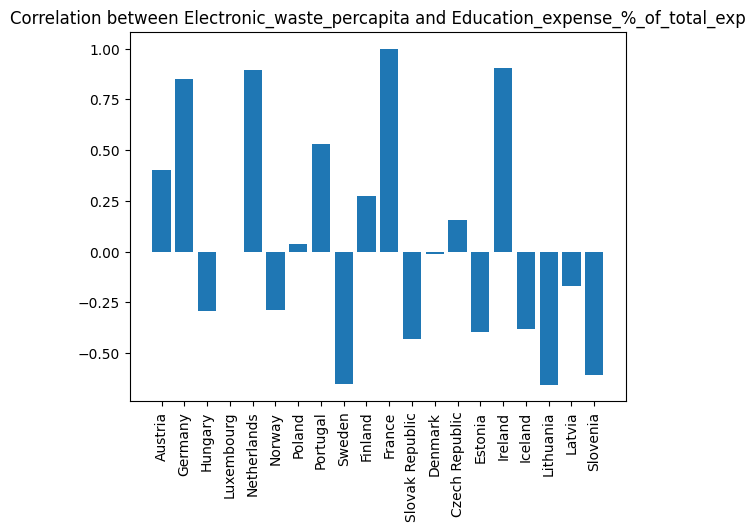

Austria:  Pearsons correlation: -0.853


/Users/vibha/opt/miniconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4427: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


Germany:  Pearsons correlation: 0.937
Hungary:  Pearsons correlation: -0.573
Luxembourg:  Pearsons correlation: nan
Netherlands:  Pearsons correlation: 0.838
Norway:  Pearsons correlation: 0.030
Poland:  Pearsons correlation: 0.001
Portugal:  Pearsons correlation: 0.149
Sweden:  Pearsons correlation: -0.589
Finland:  Pearsons correlation: 0.369
France:  Pearsons correlation: -1.000
Slovak Republic:  Pearsons correlation: -0.020
Denmark:  Pearsons correlation: -0.140
Czech Republic:  Pearsons correlation: 0.115
Estonia:  Pearsons correlation: 0.162
Ireland:  Pearsons correlation: -0.713
Iceland:  Pearsons correlation: -0.215
Lithuania:  Pearsons correlation: -0.575
Latvia:  Pearsons correlation: -0.156
Slovenia:  Pearsons correlation: -0.831


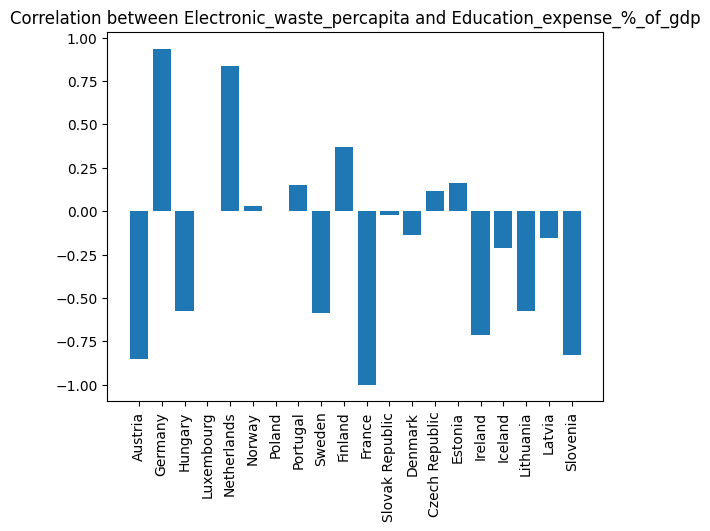

Austria:  Pearsons correlation: -0.540
Belgium:  Pearsons correlation: 0.752
Switzerland:  Pearsons correlation: -0.453
China (People's Republic of):  Pearsons correlation: -0.829
Germany:  Pearsons correlation: 0.752
Spain:  Pearsons correlation: 0.074
United Kingdom:  Pearsons correlation: 0.685
Greece:  Pearsons correlation: 0.147
Hungary:  Pearsons correlation: -0.374
Italy:  Pearsons correlation: -0.736
Japan:  Pearsons correlation: -0.925
Korea:  Pearsons correlation: -1.000
Luxembourg:  Pearsons correlation: 0.076
Netherlands:  Pearsons correlation: 0.519
Norway:  Pearsons correlation: 0.197
Poland:  Pearsons correlation: -0.312
Portugal:  Pearsons correlation: -0.669
Sweden:  Pearsons correlation: 0.839
United States:  Pearsons correlation: 0.548
Mexico:  Pearsons correlation: 0.145
Türkiye:  Pearsons correlation: 0.913
Australia:  Pearsons correlation: 0.618
Finland:  Pearsons correlation: -0.294
France:  Pearsons correlation: -0.911
Slovak Republic:  Pearsons correlation: 0.1

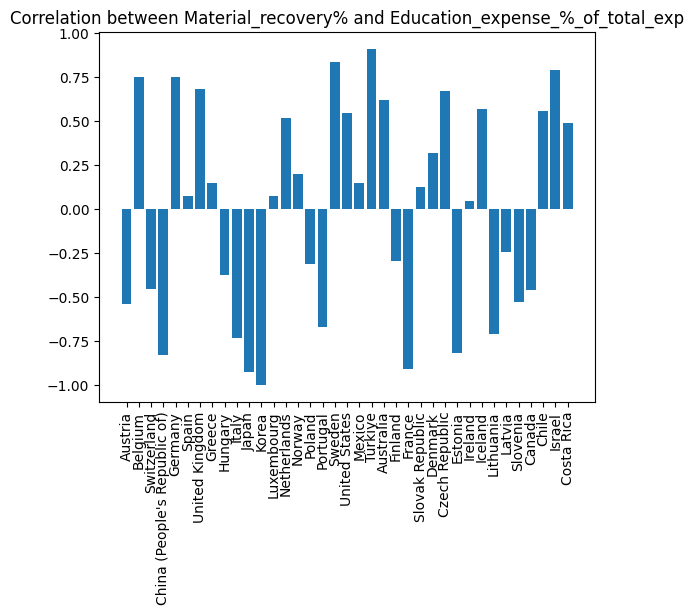

Austria:  Pearsons correlation: 0.425
Belgium:  Pearsons correlation: 0.763
Switzerland:  Pearsons correlation: 0.363
China (People's Republic of):  Pearsons correlation: -0.954
Germany:  Pearsons correlation: 0.609
Spain:  Pearsons correlation: 0.183
United Kingdom:  Pearsons correlation: 0.887
Greece:  Pearsons correlation: 0.532
Hungary:  Pearsons correlation: -0.477
Italy:  Pearsons correlation: -0.714
Japan:  Pearsons correlation: -0.147
Korea:  Pearsons correlation: 0.353
Luxembourg:  Pearsons correlation: 0.446
Netherlands:  Pearsons correlation: 0.145
Norway:  Pearsons correlation: -0.179
Poland:  Pearsons correlation: -0.459
Portugal:  Pearsons correlation: -0.014
Sweden:  Pearsons correlation: 0.589
United States:  Pearsons correlation: 0.174
Mexico:  Pearsons correlation: 0.803
Türkiye:  Pearsons correlation: 0.558
Australia:  Pearsons correlation: 0.524
Finland:  Pearsons correlation: 0.194
France:  Pearsons correlation: -0.608
Slovak Republic:  Pearsons correlation: -0.001

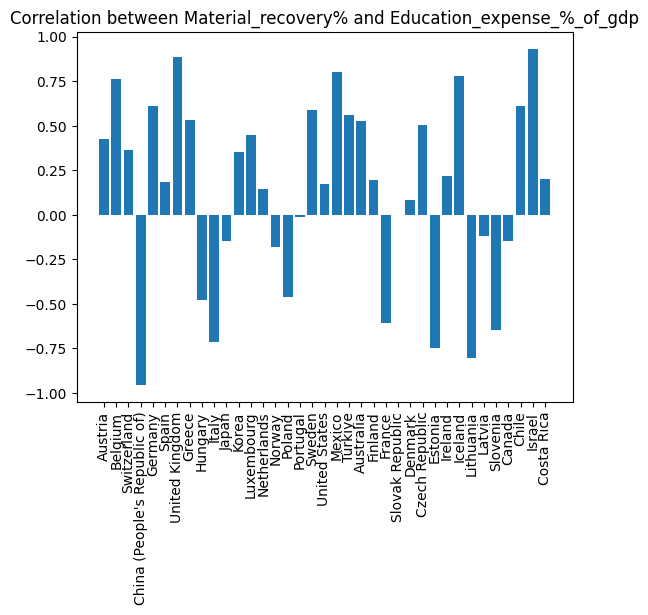

Austria:  Pearsons correlation: 0.816
Germany:  Pearsons correlation: 0.394
Hungary:  Pearsons correlation: 0.895
Netherlands:  Pearsons correlation: 0.952
Norway:  Pearsons correlation: 0.485
Poland:  Pearsons correlation: 1.000
Portugal:  Pearsons correlation: -0.530
Sweden:  Pearsons correlation: -0.457
United States:  Pearsons correlation: 1.000
Finland:  Pearsons correlation: -0.054
France:  Pearsons correlation: 0.808
Slovak Republic:  Pearsons correlation: 0.981
Denmark:  Pearsons correlation: 0.913
Czech Republic:  Pearsons correlation: 0.080
Lithuania:  Pearsons correlation: -0.346
Latvia:  Pearsons correlation: 0.702
Slovenia:  Pearsons correlation: 0.948


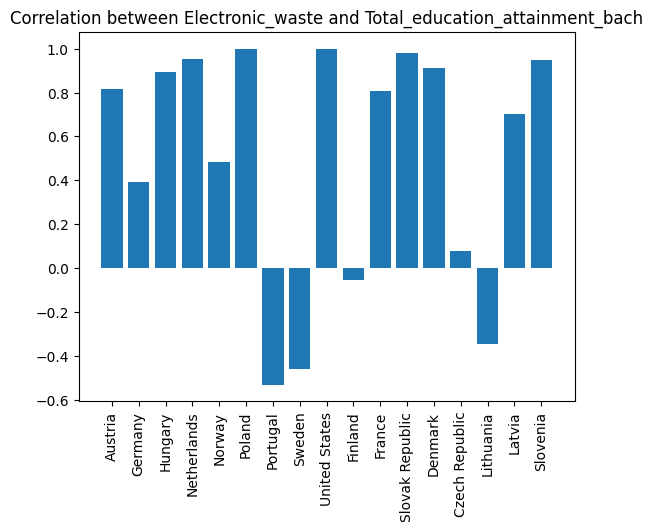

Austria:  Pearsons correlation: 0.796
Germany:  Pearsons correlation: 0.338
Hungary:  Pearsons correlation: 0.893
Netherlands:  Pearsons correlation: 0.906
Norway:  Pearsons correlation: 0.463
Poland:  Pearsons correlation: 1.000
Portugal:  Pearsons correlation: -0.506
Sweden:  Pearsons correlation: -0.569
United States:  Pearsons correlation: 1.000
Finland:  Pearsons correlation: -0.089
France:  Pearsons correlation: 0.805
Slovak Republic:  Pearsons correlation: 0.981
Denmark:  Pearsons correlation: 0.910
Czech Republic:  Pearsons correlation: 0.032
Lithuania:  Pearsons correlation: -0.306
Latvia:  Pearsons correlation: 0.714
Slovenia:  Pearsons correlation: 0.948


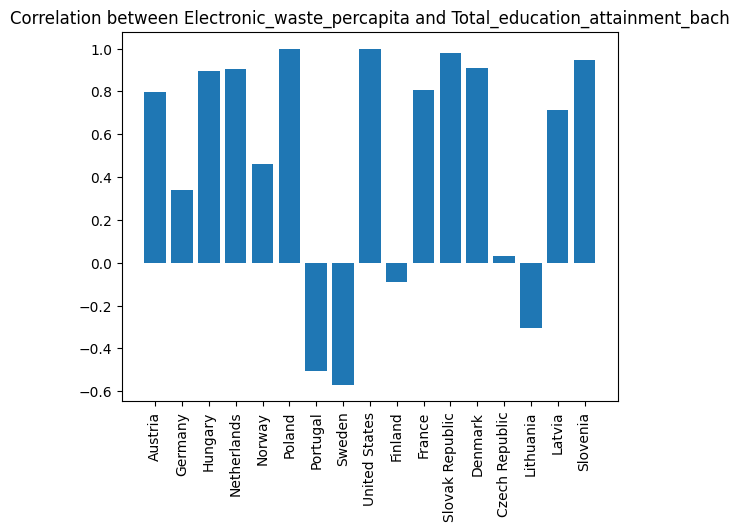

Austria:  Pearsons correlation: 0.821
Belgium:  Pearsons correlation: 0.908
Germany:  Pearsons correlation: 0.904
Spain:  Pearsons correlation: 1.000
United Kingdom:  Pearsons correlation: -0.204
Greece:  Pearsons correlation: -0.901
Hungary:  Pearsons correlation: 0.480
Korea:  Pearsons correlation: -1.000
Netherlands:  Pearsons correlation: 0.933
Norway:  Pearsons correlation: -0.445
Poland:  Pearsons correlation: 0.912
Portugal:  Pearsons correlation: 0.956
Sweden:  Pearsons correlation: -0.759
United States:  Pearsons correlation: -0.737
Australia:  Pearsons correlation: -0.739
Finland:  Pearsons correlation: 0.881
France:  Pearsons correlation: 0.792
Slovak Republic:  Pearsons correlation: 0.981
Denmark:  Pearsons correlation: 0.951
Czech Republic:  Pearsons correlation: 0.938
Ireland:  Pearsons correlation: -0.242
Lithuania:  Pearsons correlation: 0.821
Latvia:  Pearsons correlation: 0.704
Slovenia:  Pearsons correlation: 0.876
Chile:  Pearsons correlation: 1.000
Israel:  Pearson

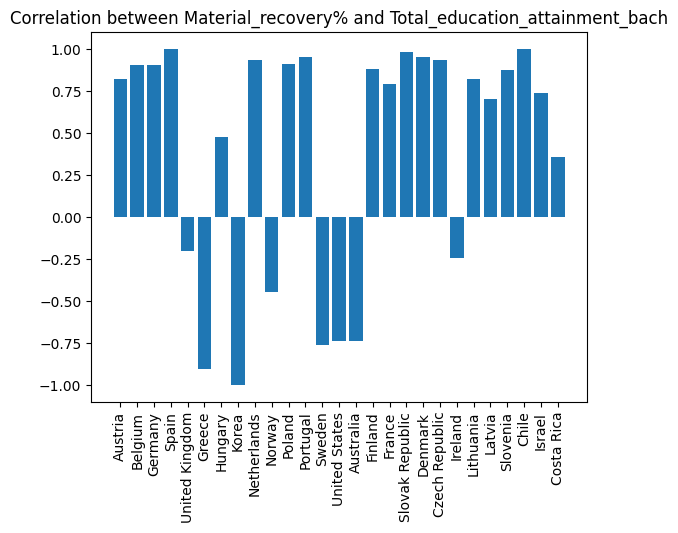

Austria:  Pearsons correlation: 0.794
Germany:  Pearsons correlation: 0.777
Hungary:  Pearsons correlation: 0.505
Netherlands:  Pearsons correlation: 0.952
Norway:  Pearsons correlation: 0.492
Poland:  Pearsons correlation: 1.000
Portugal:  Pearsons correlation: -0.511
Sweden:  Pearsons correlation: -0.457
United States:  Pearsons correlation: 1.000
Finland:  Pearsons correlation: -0.048
France:  Pearsons correlation: 0.808
Slovak Republic:  Pearsons correlation: 0.976
Denmark:  Pearsons correlation: 0.723
Czech Republic:  Pearsons correlation: 0.053
Lithuania:  Pearsons correlation: -0.358
Latvia:  Pearsons correlation: 0.575
Slovenia:  Pearsons correlation: 0.981


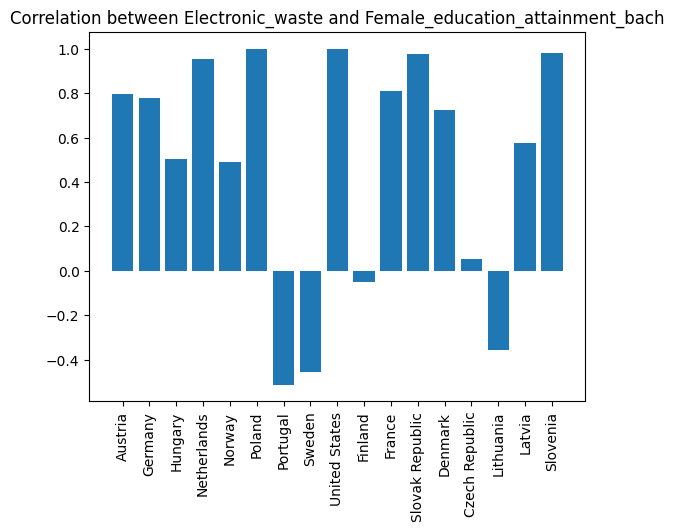

Austria:  Pearsons correlation: 0.774
Germany:  Pearsons correlation: 0.737
Hungary:  Pearsons correlation: 0.508
Netherlands:  Pearsons correlation: 0.905
Norway:  Pearsons correlation: 0.471
Poland:  Pearsons correlation: 1.000
Portugal:  Pearsons correlation: -0.487
Sweden:  Pearsons correlation: -0.568
United States:  Pearsons correlation: 1.000
Finland:  Pearsons correlation: -0.084
France:  Pearsons correlation: 0.805
Slovak Republic:  Pearsons correlation: 0.975
Denmark:  Pearsons correlation: 0.721
Czech Republic:  Pearsons correlation: 0.005
Lithuania:  Pearsons correlation: -0.318
Latvia:  Pearsons correlation: 0.592
Slovenia:  Pearsons correlation: 0.981


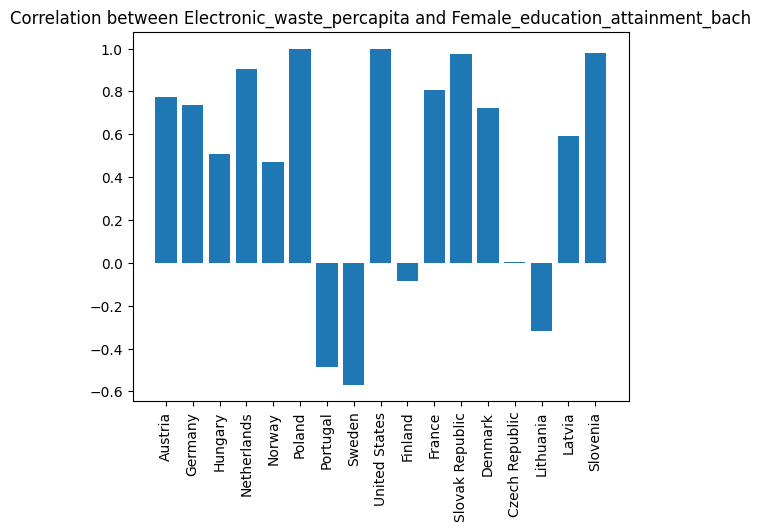

Austria:  Pearsons correlation: 0.816
Belgium:  Pearsons correlation: 0.899
Germany:  Pearsons correlation: 0.912
Spain:  Pearsons correlation: 1.000
United Kingdom:  Pearsons correlation: -0.226
Greece:  Pearsons correlation: -0.737
Hungary:  Pearsons correlation: 0.338
Korea:  Pearsons correlation: -1.000
Netherlands:  Pearsons correlation: 0.953
Norway:  Pearsons correlation: -0.437
Poland:  Pearsons correlation: 0.920
Portugal:  Pearsons correlation: 0.955
Sweden:  Pearsons correlation: -0.760
United States:  Pearsons correlation: -0.692
Australia:  Pearsons correlation: -0.820
Finland:  Pearsons correlation: 0.884
France:  Pearsons correlation: 0.795
Slovak Republic:  Pearsons correlation: 0.990
Denmark:  Pearsons correlation: 0.778
Czech Republic:  Pearsons correlation: 0.929
Ireland:  Pearsons correlation: -0.190
Lithuania:  Pearsons correlation: 0.834
Latvia:  Pearsons correlation: 0.685
Slovenia:  Pearsons correlation: 0.946
Chile:  Pearsons correlation: 1.000
Israel:  Pearson

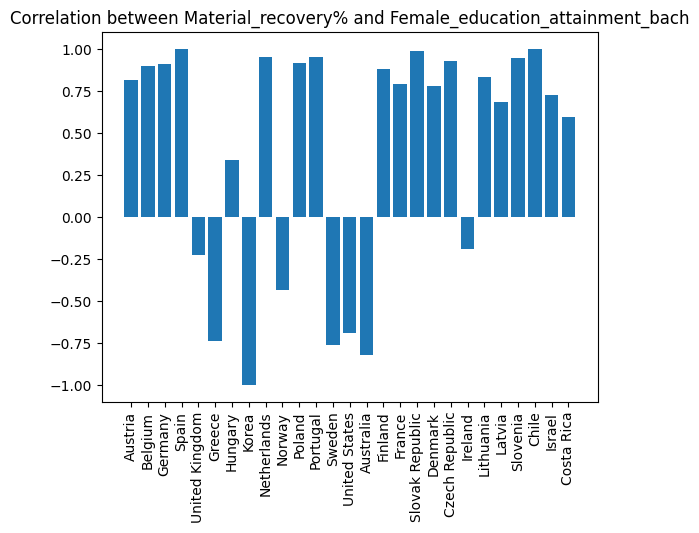

Austria:  Pearsons correlation: 0.863
Germany:  Pearsons correlation: -0.486
Hungary:  Pearsons correlation: 0.930
Netherlands:  Pearsons correlation: 0.947
Norway:  Pearsons correlation: 0.474
Poland:  Pearsons correlation: 1.000
Portugal:  Pearsons correlation: -0.558
Sweden:  Pearsons correlation: -0.457
United States:  Pearsons correlation: -1.000
Finland:  Pearsons correlation: -0.063
France:  Pearsons correlation: 0.807
Slovak Republic:  Pearsons correlation: 0.918
Denmark:  Pearsons correlation: -0.474
Czech Republic:  Pearsons correlation: 0.115
Lithuania:  Pearsons correlation: -0.326
Latvia:  Pearsons correlation: 0.861
Slovenia:  Pearsons correlation: 0.776


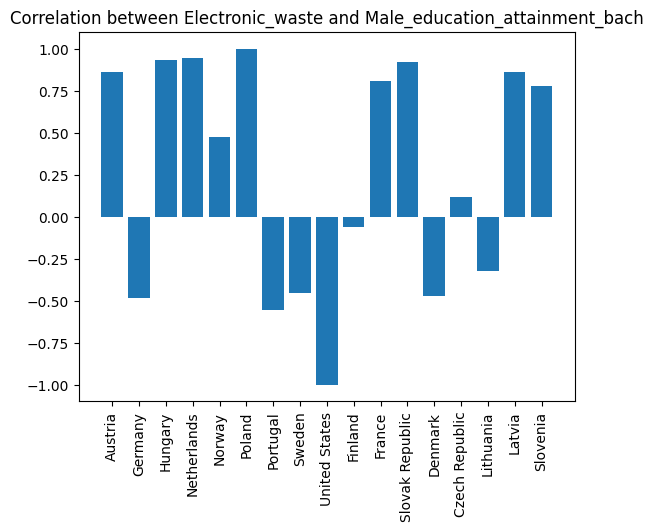

Austria:  Pearsons correlation: 0.846
Germany:  Pearsons correlation: -0.535
Hungary:  Pearsons correlation: 0.927
Netherlands:  Pearsons correlation: 0.903
Norway:  Pearsons correlation: 0.453
Poland:  Pearsons correlation: 1.000
Portugal:  Pearsons correlation: -0.535
Sweden:  Pearsons correlation: -0.569
United States:  Pearsons correlation: -1.000
Finland:  Pearsons correlation: -0.098
France:  Pearsons correlation: 0.804
Slovak Republic:  Pearsons correlation: 0.918
Denmark:  Pearsons correlation: -0.473
Czech Republic:  Pearsons correlation: 0.068
Lithuania:  Pearsons correlation: -0.285
Latvia:  Pearsons correlation: 0.861
Slovenia:  Pearsons correlation: 0.775


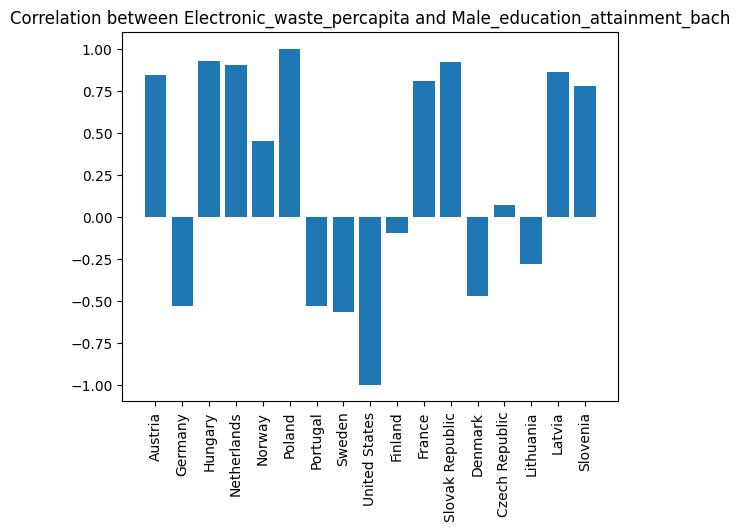

Austria:  Pearsons correlation: 0.827
Belgium:  Pearsons correlation: 0.911
Germany:  Pearsons correlation: 0.351
Spain:  Pearsons correlation: 0.998
United Kingdom:  Pearsons correlation: -0.176
Greece:  Pearsons correlation: -0.971
Hungary:  Pearsons correlation: 0.641
Korea:  Pearsons correlation: -1.000
Netherlands:  Pearsons correlation: 0.898
Norway:  Pearsons correlation: -0.454
Poland:  Pearsons correlation: 0.895
Portugal:  Pearsons correlation: 0.954
Sweden:  Pearsons correlation: -0.756
United States:  Pearsons correlation: -0.791
Australia:  Pearsons correlation: -0.601
Finland:  Pearsons correlation: 0.875
France:  Pearsons correlation: 0.788
Slovak Republic:  Pearsons correlation: 0.922
Denmark:  Pearsons correlation: -0.398
Czech Republic:  Pearsons correlation: 0.898
Ireland:  Pearsons correlation: -0.301
Lithuania:  Pearsons correlation: 0.793
Latvia:  Pearsons correlation: 0.676
Slovenia:  Pearsons correlation: 0.703
Chile:  Pearsons correlation: 1.000
Israel:  Pearso

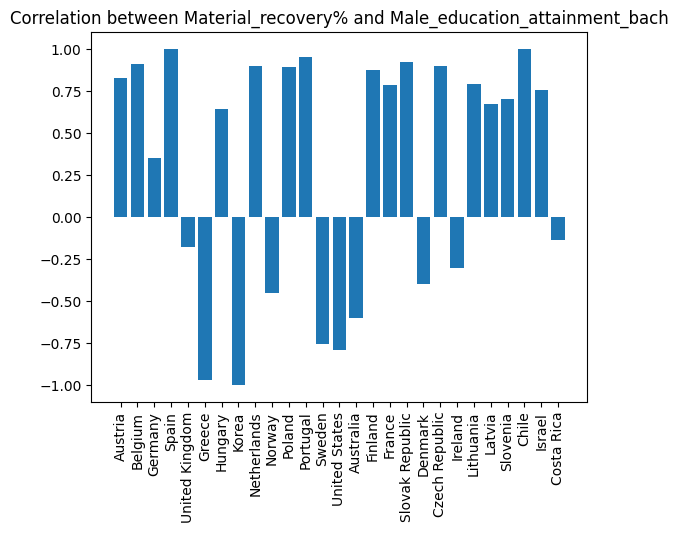

In [32]:
for variable_pair in corr_varlist: 
    cor_country_list = []
    Cor_educ_exp_total_electronic_list = []
    for country in Country_list:
        temp_var = hyp1_df.where(hyp1_df['Country']==country)
        temp_var = temp_var.dropna(subset = [variable_pair[0],variable_pair[1]])
        if len(temp_var[variable_pair[0]]) <2 or len(temp_var[variable_pair[1]]) <2:
            continue   
        corr, _ = pearsonr(temp_var[variable_pair[0]], temp_var[variable_pair[1]])
        Cor_educ_exp_total_electronic_list.append(corr)
        cor_country_list.append(country)
        print(country + ': ' + ' Pearsons correlation: %.3f' % corr)

    plt.bar(cor_country_list, Cor_educ_exp_total_electronic_list)
    plt.title('Correlation between ' + variable_pair[0] + ' and ' + variable_pair[1])
    plt.xticks(rotation = 90)
    plt.show()    

###### Conclusion

1. Electronic waste generation & Education expense as % of total govt. expsense: France has a perfect positive correlation of 100%. Netherlands, Germany and Ireland also have a strong (>80%) positive correlation. Same was true when we evaluated against electronic waste per capita. Our hypothesis was proven wrong in this case. 


2. Electronic waste generation & Education expense as % of GDP: France has a perfect negative correlation. Austria, Ireland and Slovania also have a strong negative correlation. Our hyypothesis was proven correct for these countries. Germany and Netherlands have a strong positive correlation. Same was true when we evaluated against electronic waste per capita. Our hypothesis was proven wrong for these countries. 


3. Material Recovery & Education expense as % of total govt. expsense: Belgium, Germany, Spain, UK, Sweden, Turkey, Australia, Israel and Czech Republic have strong positive correlation. Our hypothesis was proven correct for these countries. China, Italy, Japan, Korea (-100%), Portugal, France, Estonia and Lithuania all have a strong negative correlation. Our hypothesis was proven wrong for these countries.


4. Material Recovery & Education expense as % of GDP: Belgium, Germany, UK, Mexico, Chile and Israel have a strong positive correlation. Our hypothesis was proven correct for these countries. China, Italy, France, Estonia, Lithuania and Slovenia have a strong negative correlation. 


5. Electronic waste generation & Total Education Attainment: We don't notice any strong negative correlation in this case, proving our hypothesis incorrect. On the contrary, US (100%), France, Hungary, Austria, Slovak Republic, Denmark, Latvia and Slovenia have a strong positive correlation. Same was noted when compared to electronic waste per capita. 


6. Material Recovery & Total Education Attainment: Spain (100%), Germany, Belgium, Netherlands, Poland, Portugal, Finland, France, Slovak Republic, Denmark, Czech Republic, Lithuania, Latvia, Slovenia, Chile (100%) and Israel all have a strong positive correlated. Our hyypothesis was proven correct for these countries in this case. The same was the case when compared against Female & Male Education Attainment. 


7. Electronic waste generation & Female/Male Education Attainment: We don't notice any strong negative correlation in this case, proving our hypothesis incorrect. On the contrary, US (100%), Austria, Germany, Netherlands, Poland (100%), France, Slovakia, Denmark and Sloveni, all have a strong positive correlation. Same was noted when compared to electronic waste per capita.  


In [ ]:
# Subplots for each country for Material recovery, electronic waste and electronic waste per capita